Data Analysis with IPL match-by-match dataset from the seasons 2008 to 2020.

Dataset has been downloaded from Kaggle and it can be found here: https://www.kaggle.com/patrickb1912/ipl-complete-dataset-20082020.

The dataset contains two files: deliveries.csv and matches.csv. The file used for this analysis is matches.csv.

Things analysed:

i) Match won by the maximum margin of runs.

ii) Match won by maximum wickets.

iii) Match won by the minimum margin of runs.

iv) Match won by minimum wickets.

v) Matches where D/L method was and wasn't applied.

vi) No. of matches held in each city.

vii) No. of matches won by each team.

viii) No. of matches held every season.

ix) Top 10 players based on no. of Man of Match (ManOfMatch) awards won.

x) Does winning the toss mean winning the match?

xi) What was the decision taken by captains when they won the toss?

xii) No. of matches where D/L method was applied every season.

xiii) Different results for matches.

xiv) How many times did a team win the toss?

xv) Best venue for defending and chasing a total.

xvi) Best defending and chasing teams.

xvii) No. of matches played in different stadiums.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (14, 8)

In [ ]:
matches=pd.read_csv('IPL Matches.csv')

In [ ]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,dl_applied,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [ ]:

matches.describe()


,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [ ]:

matches['method'].unique()

array([nan, 'D/L'], dtype=object)

In [ ]:

matches = matches.rename(columns={'method' : 'dl_applied'})

matches.fillna(0)

matches['date'] = pd.to_datetime(matches['date'])

matches['season'] = matches['date'].dt.year

In [ ]:
matches['season'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020], dtype=int64)

In [ ]:
matches['result'].count()

812

In [ ]:
matches['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

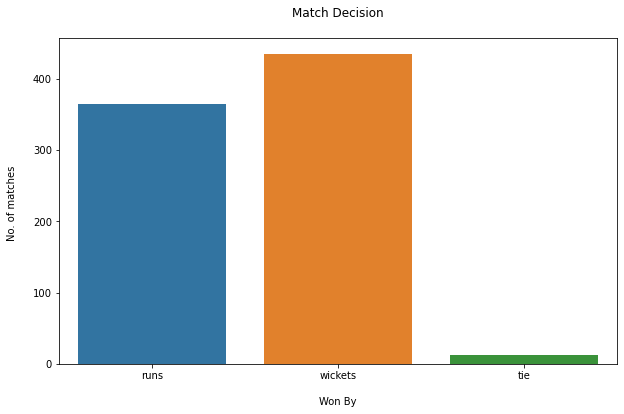

In [ ]:
sns.countplot(x=matches['result'], data=matches)
plt.title('Match Decision\n')
plt.xlabel('\nWon By')
plt.ylabel('No. of matches \n')
plt.show()

In [ ]:
#Max margin for winning a match
max(matches['result_margin'])

146.0

In [ ]:
# Matches won by more than 120 runs 
label1 = matches[(matches['result']=='runs') & (matches['result_margin']>=120)].index.tolist()

matches.iloc[label1]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,dl_applied,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
351,598027,Bangalore,2013-04-23,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,Royal Challengers Bangalore,runs,130.0,N,NaN,Aleem Dar,C Shamshuddin,2013
497,829785,Bangalore,2015-05-06,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,Royal Challengers Bangalore,runs,138.0,N,NaN,RK Illingworth,VA Kulkarni,2015
560,980987,Bangalore,2016-05-14,AB de Villiers,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,Royal Challengers Bangalore,runs,144.0,N,NaN,AY Dandekar,VK Sharma,2016
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


In [ ]:
# Match won by the maximum margin of runs
matches.iloc[matches['result_margin'].idxmax()]

id                             1082635
city                             Delhi
date               2017-05-06 00:00:00
player_of_match            LMP Simmons
venue                 Feroz Shah Kotla
neutral_venue                        0
team1                 Delhi Daredevils
team2                   Mumbai Indians
toss_winner           Delhi Daredevils
toss_decision                    field
winner                  Mumbai Indians
result                            runs
result_margin                      146
eliminator                           N
dl_applied                         NaN
umpire1                    Nitin Menon
umpire2                      CK Nandan
season                            2017
Name: 620, dtype: object

In [ ]:
# Match won by maximum wickets
matches.iloc[matches.loc[matches['result']=='wickets','result_margin'].idxmax()]

id                                     335994
city                                   Mumbai
date                      2008-04-27 00:00:00
player_of_match                  AC Gilchrist
venue              Dr DY Patil Sports Academy
neutral_venue                               0
team1                          Mumbai Indians
team2                         Deccan Chargers
toss_winner                   Deccan Chargers
toss_decision                           field
winner                        Deccan Chargers
result                                wickets
result_margin                              10
eliminator                                  N
dl_applied                                NaN
umpire1                             Asad Rauf
umpire2                            SL Shastri
season                                   2008
Name: 12, dtype: object

In [ ]:
# Matches won by more than 9 wickets 
label2 = matches[(matches['result']=='wickets') & (matches['result_margin']>9)].index.tolist()

matches.iloc[label2]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,dl_applied,umpire1,umpire2,season
12,335994,Mumbai,2008-04-27,AC Gilchrist,Dr DY Patil Sports Academy,0,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,Deccan Chargers,wickets,10.0,N,NaN,Asad Rauf,SL Shastri,2008
60,392183,Cape Town,2009-04-19,DL Vettori,Newlands,1,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,field,Delhi Daredevils,wickets,10.0,N,D/L,MR Benson,SD Ranade,2009
124,419115,Bangalore,2010-03-18,JH Kallis,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,10.0,N,NaN,K Hariharan,DJ Harper,2010
239,501263,Mumbai,2011-05-20,SR Watson,Wankhede Stadium,0,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,Rajasthan Royals,wickets,10.0,N,NaN,RE Koertzen,PR Reiffel,2011
317,548377,Jaipur,2012-05-20,DR Smith,Sawai Mansingh Stadium,0,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,Mumbai Indians,wickets,10.0,N,NaN,HDPK Dharmasena,C Shamshuddin,2012
331,598007,Chandigarh,2013-04-10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,10.0,N,NaN,Aleem Dar,C Shamshuddin,2013
483,829757,Delhi,2015-04-26,VR Aaron,Feroz Shah Kotla,0,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,10.0,N,NaN,M Erasmus,S Ravi,2015
531,980929,Rajkot,2016-04-21,B Kumar,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,10.0,N,NaN,K Bharatan,HDPK Dharmasena,2016
579,1082593,Rajkot,2017-04-07,CA Lynn,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,10.0,N,NaN,Nitin Menon,CK Nandan,2017
611,1082626,Chandigarh,2017-04-30,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",0,Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,field,Kings XI Punjab,wickets,10.0,N,NaN,YC Barde,CK Nandan,2017


In [ ]:

# Match won by minimum margin of runs 
matches.iloc[matches.loc[matches['result']=='runs','result_margin'].idxmin()]

id                              336028
city                            Mumbai
date               2008-05-21 00:00:00
player_of_match               SE Marsh
venue                 Wankhede Stadium
neutral_venue                        0
team1                   Mumbai Indians
team2                  Kings XI Punjab
toss_winner             Mumbai Indians
toss_decision                    field
winner                 Kings XI Punjab
result                            runs
result_margin                        1
eliminator                           N
dl_applied                         NaN
umpire1                      BF Bowden
umpire2                 GA Pratapkumar
season                            2008
Name: 46, dtype: object

In [ ]:
# Matches won by close margin of runs 
label3 = matches[(matches['result']=='runs') & (matches['result_margin']<3)].index.tolist()

matches.iloc[label3]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,dl_applied,umpire1,umpire2,season
46,336028,Mumbai,2008-05-21,SE Marsh,Wankhede Stadium,0,Mumbai Indians,Kings XI Punjab,Mumbai Indians,field,Kings XI Punjab,runs,1.0,N,NaN,BF Bowden,GA Pratapkumar,2008
100,392225,Durban,2009-05-14,SK Warne,Kingsmead,1,Mumbai Indians,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,runs,2.0,N,NaN,BR Doctrove,DJ Harper,2009
104,392229,Johannesburg,2009-05-17,Yuvraj Singh,New Wanderers Stadium,1,Deccan Chargers,Kings XI Punjab,Deccan Chargers,field,Kings XI Punjab,runs,1.0,N,NaN,S Ravi,RB Tiffin,2009
150,419141,Nagpur,2010-04-05,SK Warne,"Vidarbha Cricket Association Stadium, Jamtha",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,runs,2.0,N,NaN,HDPK Dharmasena,SJA Taufel,2010
175,501198,Chennai,2011-04-08,S Anirudha,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,Chennai Super Kings,runs,2.0,N,NaN,BR Doctrove,PR Reiffel,2011
265,548323,Kolkata,2012-04-15,SP Narine,Eden Gardens,0,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,field,Kings XI Punjab,runs,2.0,N,NaN,Asad Rauf,S Asnani,2012
285,548345,Delhi,2012-04-29,V Sehwag,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,Delhi Daredevils,runs,1.0,N,NaN,S Ravi,RJ Tucker,2012
291,548351,Pune,2012-05-03,SL Malinga,Subrata Roy Sahara Stadium,0,Pune Warriors,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,1.0,N,NaN,Asad Rauf,S Asnani,2012
323,597999,Bangalore,2013-04-04,CH Gayle,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,runs,2.0,N,NaN,VA Kulkarni,C Shamshuddin,2013
408,729299,NaN,2014-04-24,CA Lynn,Sharjah Cricket Stadium,1,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2.0,N,NaN,Aleem Dar,VA Kulkarni,2014


In [ ]:
# Matches won by minimum wickets (not by 0 wickets)
label = matches[(matches['result']=='wickets') & (matches['result_margin']<=1)].index.tolist()

matches.iloc[label]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,dl_applied,umpire1,umpire2,season
500,829791,Kolkata,2015-05-09,AD Russell,Eden Gardens,0,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,bat,Kolkata Knight Riders,wickets,1.0,N,NaN,AK Chaudhary,HDPK Dharmasena,2015
636,1136561,Mumbai,2018-04-07,DJ Bravo,Wankhede Stadium,0,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore,2018
642,1136567,Hyderabad,2018-04-12,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Mumbai Indians,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,1.0,N,NaN,NJ Llong,CK Nandan,2018


In [ ]:
# Match won by minimum wickets (not by 0 wickets)
matches.iloc[matches.loc[matches['result']=='wickets','result_margin'].idxmin()]

id                                829791
city                             Kolkata
date                 2015-05-09 00:00:00
player_of_match               AD Russell
venue                       Eden Gardens
neutral_venue                          0
team1              Kolkata Knight Riders
team2                    Kings XI Punjab
toss_winner              Kings XI Punjab
toss_decision                        bat
winner             Kolkata Knight Riders
result                           wickets
result_margin                          1
eliminator                             N
dl_applied                           NaN
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
season                              2015
Name: 500, dtype: object

In [ ]:
# Matches where D/L method was and wasn't applied
matches['dl_applied'].value_counts()

D/L    19
Name: dl_applied, dtype: int64

In [ ]:
round(matches['dl_applied'].value_counts()/matches['id'].count()*100, 2)

D/L    2.33
Name: dl_applied, dtype: float64

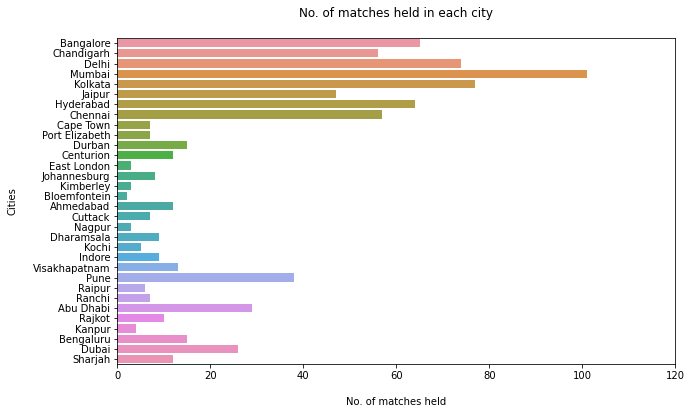

In [ ]:
plt.rcParams['figure.figsize']=10,6

sns.countplot(y='city', data=matches)
plt.title('No. of matches held in each city\n')
plt.xlabel('\nNo. of matches held')
plt.ylabel('Cities\n')
plt.xlim([0,120])
plt.show()

In [ ]:
matches["winner"].replace({"Rising Pune Supergiant": "Rising Pune Supergiants"}, inplace=True)
matches["team1"].replace({"Rising Pune Supergiant": "Rising Pune Supergiants"}, inplace=True)
matches["team2"].replace({"Rising Pune Supergiant": "Rising Pune Supergiants"}, inplace=True)
matches["toss_winner"].replace({"Rising Pune Supergiant": "Rising Pune Supergiants"}, inplace=True)

In [ ]:
matches['winner'].value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

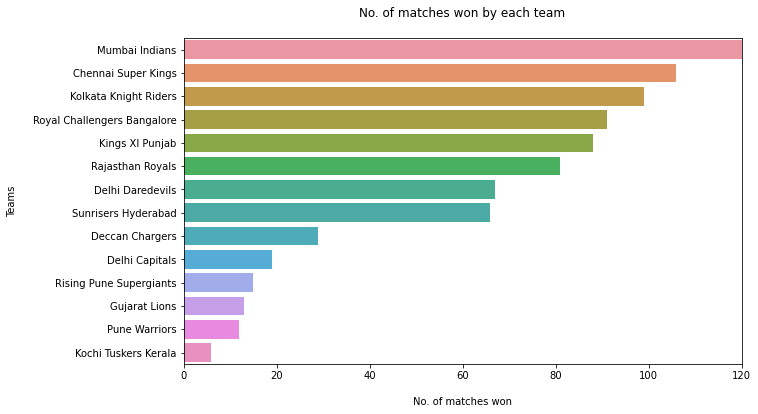

In [ ]:
data=matches['winner'].value_counts()
fig, ax=plt.subplots()
ax.set_xlim([0,120])
sns.barplot(y=data.index, x=data, orient='h')
plt.title('No. of matches won by each team\n')
plt.xlabel("\nNo. of matches won")
plt.ylabel('Teams\n')
plt.show()

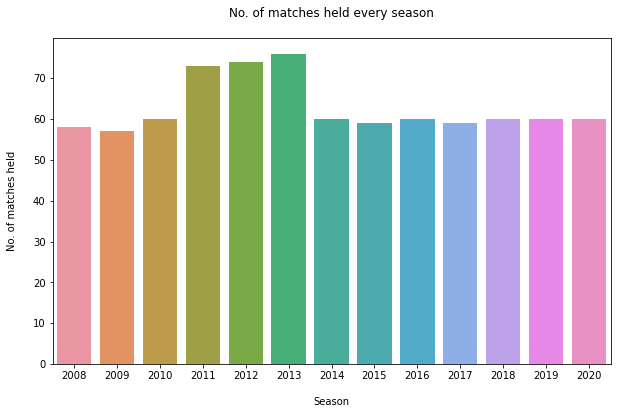

In [ ]:
matches['date'] = pd.to_datetime(matches['date'])

sns.countplot(x=matches['date'].dt.year, data=matches)
plt.title('No. of matches held every season\n')
plt.xlabel('\nSeason')
plt.ylabel('No. of matches held\n')
plt.show()

In [ ]:
ManOfMatch=matches['player_of_match'].value_counts()[:10]
ManOfMatch

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
YK Pathan         16
SR Watson         16
SK Raina          14
V Kohli           13
G Gambhir         13
Name: player_of_match, dtype: int64

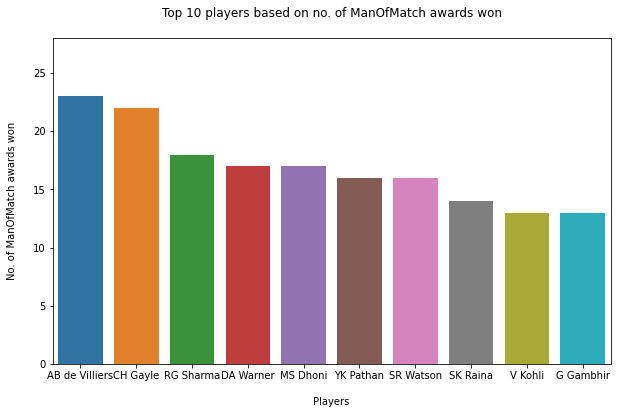

In [ ]:
fig, ax=plt.subplots()
ax.set_ylim([0,28])
ax.set_title('Top 10 players based on no. of ManOfMatch awards won\n')
sns.barplot(x=ManOfMatch.index, y=ManOfMatch, orient='v')
plt.ylabel('No. of ManOfMatch awards won\n')
plt.xlabel('\nPlayers')
plt.show()

In [ ]:

# Does winning the toss mean winning the match?
winnerwinner=matches['toss_winner']== matches['winner']
winnerwinner.groupby(winnerwinner).size()

False    398
True     418
dtype: int64

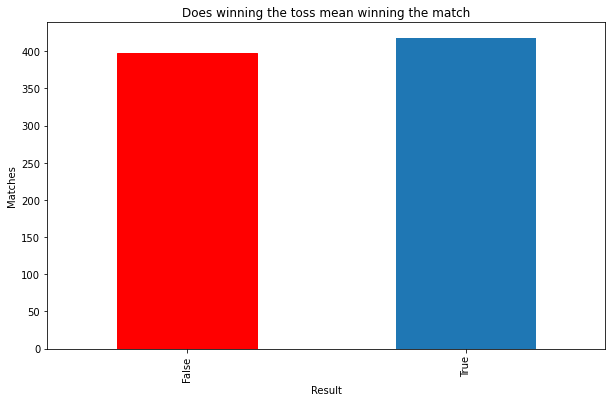

In [ ]:
x_labels = ['False','True'] 
ax = winnerwinner.groupby(winnerwinner).size().plot(kind='bar')
ax.set_title('Does winning the toss mean winning the match')
ax.set_xlabel('Result')
ax.set_ylabel('Matches')
ax.set_xticklabels(x_labels)
ax.get_children()
ax.get_children()[0].set_color('r')

In [ ]:
# % of games where the toss winning team lost the match (indicated by false) and toss winning team won the match(indicated by true)
round(winnerwinner.groupby(winnerwinner).size() / winnerwinner.count() * 100,2)

False    48.77
True     51.23
dtype: float64

([<matplotlib.patches.Wedge at 0x21e1dd08130>,
 [Text(-1.0991848680938299, 0.04233941135100722, 'False'),
  Text(1.09918486809383, -0.04233941135100686, 'True')])

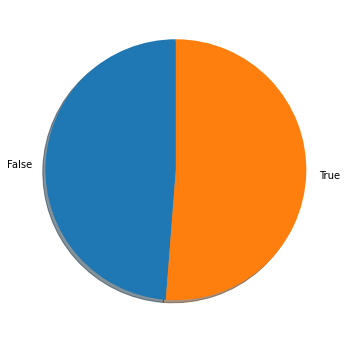

In [ ]:
# % of games where the toss winning team lost the match (indicated by false) and toss winning team won the match(indicated by true)
labels = ['False','True']

plt.pie(winnerwinner.groupby(winnerwinner).size(),labels=labels,shadow=True, startangle=90)

In [ ]:
matches['toss_decision'].value_counts()


field    496
bat      320
Name: toss_decision, dtype: int64

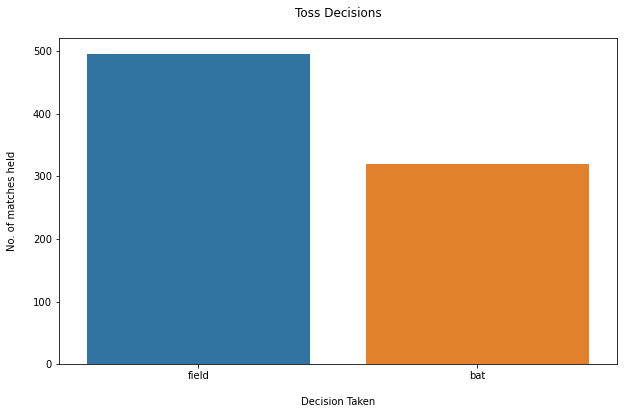

In [ ]:
sns.countplot(x=matches['toss_decision'], data=matches)
plt.title('Toss Decisions\n')
plt.xlabel('\nDecision Taken')
plt.ylabel('No. of matches held\n')
plt.show()

In [ ]:

# % of matches where the toss winning team's captain chose fielding and batting
round(matches['toss_decision'].value_counts()/matches['toss_decision'].count()*100, 2)

field    60.78
bat      39.22
Name: toss_decision, dtype: float64

([<matplotlib.patches.Wedge at 0x21e1dd976a0>,
 [Text(-1.0375194051868581, -0.365449700862798, 'Field'),
  Text(1.0375193709709831, 0.36544979800237354, 'Bat')])

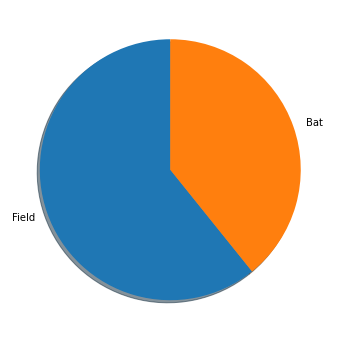

In [ ]:
#Decision Taken By toss winning captains
lbl=['Field','Bat']
plt.pie(round(matches['toss_decision'].value_counts()/matches['toss_decision'].count()*100, 2),labels=lbl,shadow=True, startangle=90)

In [ ]:
## Stadiums which have hosted D/L method applied matches 
matches.query('dl_applied=="D/L"')['venue']


40                                      Feroz Shah Kotla
43                                          Eden Gardens
60                                              Newlands
63                                             Kingsmead
89                                       SuperSport Park
192                                        Nehru Stadium
221                                         Eden Gardens
231                                M Chinnaswamy Stadium
429                                     Feroz Shah Kotla
477    Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
508            Rajiv Gandhi International Stadium, Uppal
538            Rajiv Gandhi International Stadium, Uppal
561                                         Eden Gardens
565    Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
566                                M Chinnaswamy Stadium
633                                M Chinnaswamy Stadium
641                               Sawai Mansingh Stadium
653                            

In [ ]:
# Cities which have witnessed D/L method applied matches
matches.query('dl_applied=="D/L"')['city']

40             Delhi
43           Kolkata
60         Cape Town
63            Durban
89         Centurion
192            Kochi
221          Kolkata
231        Bangalore
429            Delhi
477    Visakhapatnam
508        Hyderabad
538        Hyderabad
561          Kolkata
565    Visakhapatnam
566        Bangalore
633        Bangalore
641           Jaipur
653          Kolkata
667            Delhi
Name: city, dtype: object

In [ ]:
# Seasons with D/L method applied matches
matches['date'] = pd.to_datetime(matches['date'])

matches['season'] = matches['date'].dt.year

# Seasons with D/L method applied matches
year=matches.query('dl_applied=="D/L"')['season']
year

40     2008
43     2008
60     2009
63     2009
89     2009
192    2011
221    2011
231    2011
429    2014
477    2015
508    2015
538    2016
561    2016
565    2016
566    2016
633    2017
641    2018
653    2018
667    2018
Name: season, dtype: int64

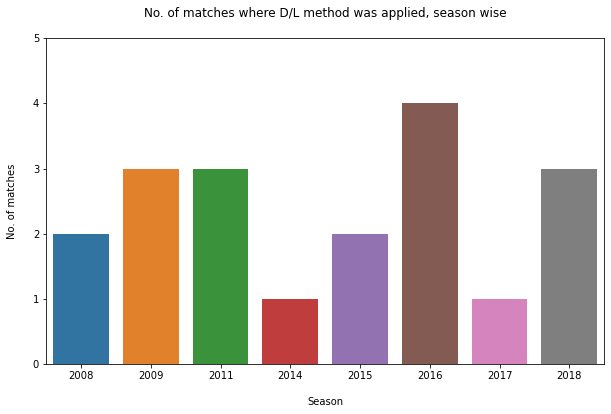

In [ ]:
# Plot to visualise the no. of matches where D/L method was applied season wise
fig, ax=plt.subplots()
ax.set_ylim([0,5])
ax.set_title('No. of matches where D/L method was applied, season wise\n')
sns.countplot(x=year, data=matches)
plt.xlabel('\nSeason')
plt.ylabel('No. of matches\n')
plt.show()

In [ ]:
# How many times did each team win the toss?
matches['toss_winner'].value_counts()

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Delhi Capitals                  20
Pune Warriors                   20
Gujarat Lions                   15
Rising Pune Supergiants         13
Kochi Tuskers Kerala             8
Name: toss_winner, dtype: int64

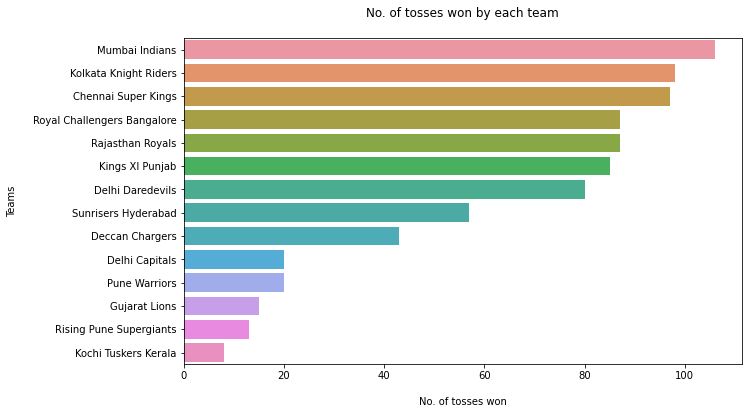

In [ ]:
# Plot to visualise the no. of tosses won by each team
toss=matches['toss_winner'].value_counts()
fig, ax=plt.subplots()
ax.set_title('No. of tosses won by each team\n')
sns.barplot(y=toss.index, x=toss, orient='h')
plt.xlabel('\nNo. of tosses won')
plt.ylabel('Teams\n')
plt.show()

In [ ]:
# Best venue for defending your total
matches.venue[(matches.result=='runs') & (matches.result_margin!=0)].mode()

0    Feroz Shah Kotla
1    Wankhede Stadium
dtype: object

In [ ]:
# Best venue to chase a total
matches.venue[(matches.result=='wickets') & (matches.result_margin!=0)].mode()

0    Eden Gardens
dtype: object

In [ ]:
# Best defending team
matches.winner[(matches.result=='runs') & (matches.result_margin!=0)].mode()

0    Mumbai Indians
dtype: object

In [ ]:
# Best chasing team
matches.winner[(matches.result=='wickets') & (matches.result_margin!=0)].mode()

0    Kolkata Knight Riders
dtype: object

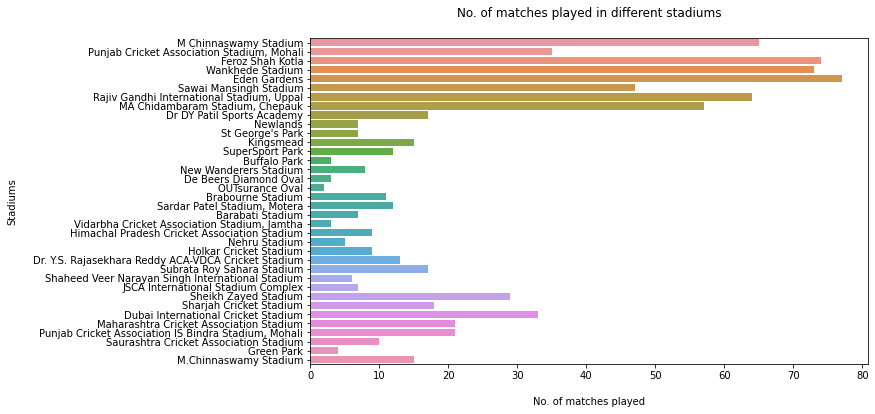

In [ ]:
# No. of matches played in different stadiums
sns.countplot(y='venue', data=matches)
plt.title('No. of matches played in different stadiums\n')
plt.xlabel('\nNo. of matches played')
plt.ylabel('Stadiums\n')
plt.show()

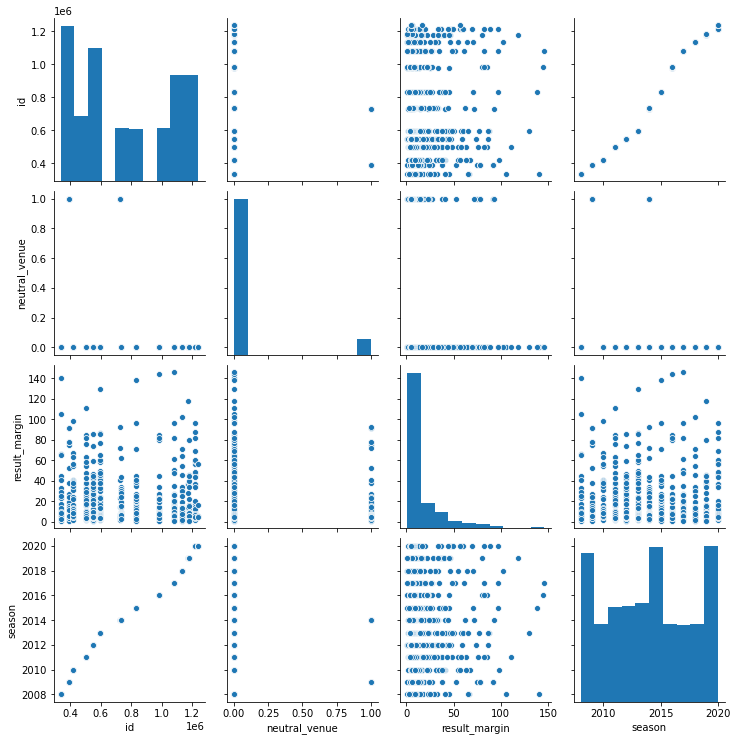

In [ ]:
sns.pairplot(matches)

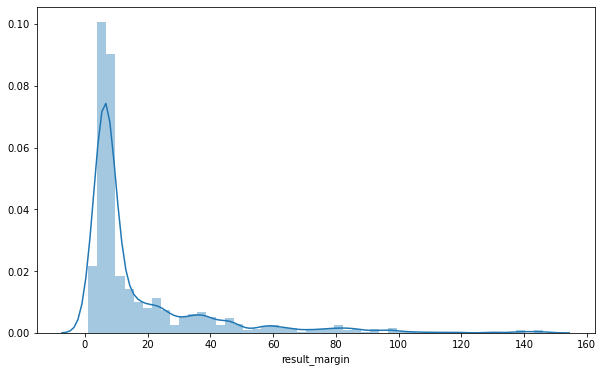

In [ ]:
sns.distplot(matches['result_margin'])

In [ ]:
corr = matches.corr()
corr

,id,neutral_venue,result_margin,season
id,1.000000,-0.292042,-0.010501,0.987786
neutral_venue,-0.292042,1.000000,-0.006445,-0.319704
result_margin,-0.010501,-0.006445,1.000000,-0.002171
season,0.987786,-0.319704,-0.002171,1.000000


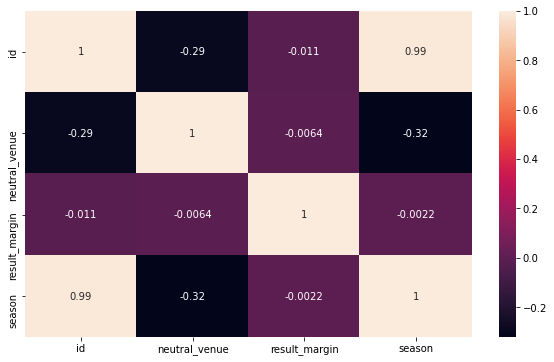

In [ ]:
sns.heatmap(corr,annot=True)

Text(0.5, 0, 'Year')

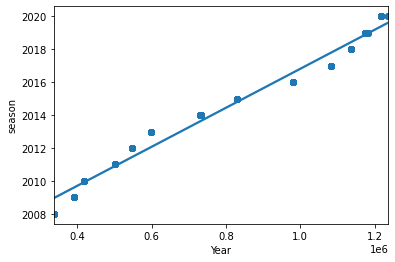

In [ ]:
sns.regplot(x='id', y='season', data=matches)
plt.xlabel('Year')